In [100]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"datasets\mlbootcamp5.csv", sep=';')
display(data.head(20))


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [101]:
data['age_years'] = data['age'] / 365.25
data['age_years'] = data['age_years'].round(0).astype(int)
data['BMI'] = data['weight'] / (data['height'] / 100) ** 2
data['BMI'] = data['BMI'].round(0).astype(int)


avg =  data.groupby('gender')[['height', 'weight', 'BMI', 'age_years']].mean()


grouped = data.groupby(['gender', 'smoke']).size().reset_index(name='count')
total_by_gender = data.groupby('gender').size().reset_index(name='total')
merged = pd.merge(grouped, total_by_gender, on='gender')
merged['percent'] = merged['count'] / merged['total'] * 100
merged['gender'] = merged['gender'].map({1: 'Female', 2: 'Male'})
merged['smoke'] = merged['smoke'].map({0: 'Non-smoker', 1: 'Smoker'})


display(data.head(20))
display(merged)
display(avg)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,35
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,24
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,29
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61,38
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62,30
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54,25


,gender,smoke,count,total,percent
0,Female,Non-smoker,44717,45530,98.214364
1,Female,Smoker,813,45530,1.785636
2,Male,Non-smoker,19114,24470,78.111974
3,Male,Smoker,5356,24470,21.888026


,height,weight,BMI,age_years
gender,,,,
1,161.355612,72.565605,27.980430,53.416670
2,169.947895,77.257307,26.745934,53.091949


In [102]:
print(data.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age_years        int64
BMI              int64
dtype: object


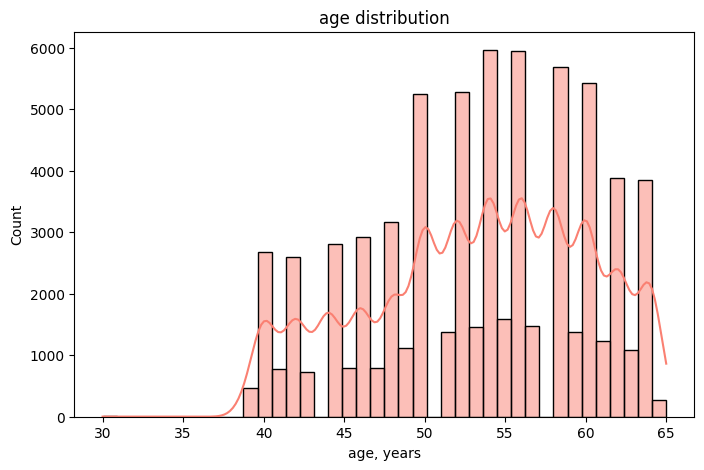

Text(0, 0.5, 'Count')

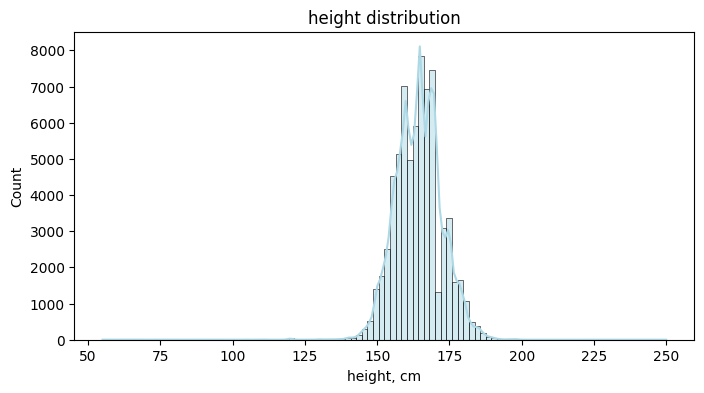

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=data, x='age_years', bins=40, kde=True, color='salmon')
plt.title('age distribution')
plt.xlabel('age, years')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8,4))
sns.histplot(data=data, x='height', bins=100, kde=True, color='lightblue')
plt.title('height distribution')
plt.xlabel('height, cm')
plt.ylabel('Count')

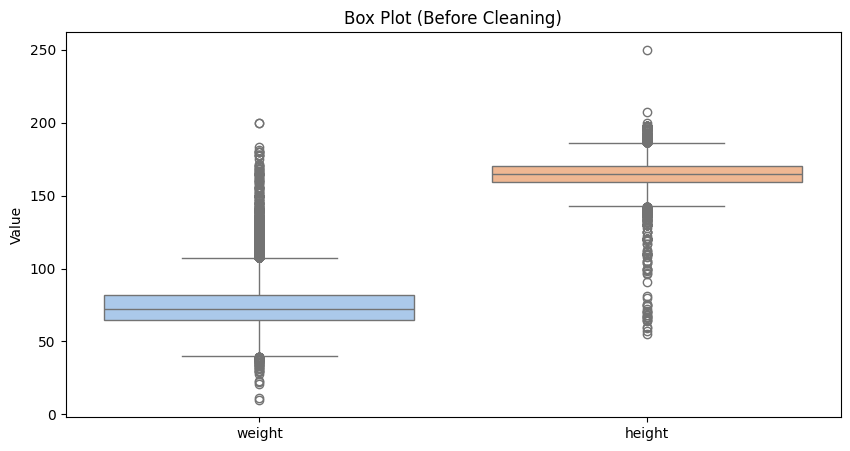

Before cleaning: 70000 rows
After cleaning:  67723 rows
Removed: 3.25% of rows


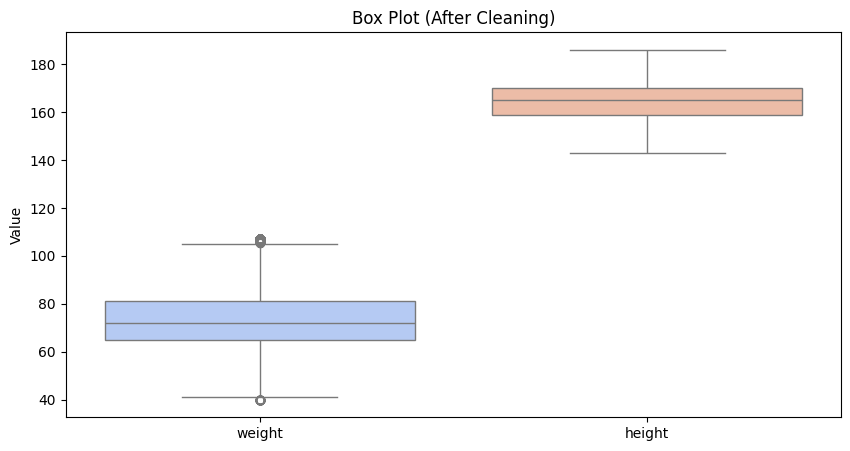

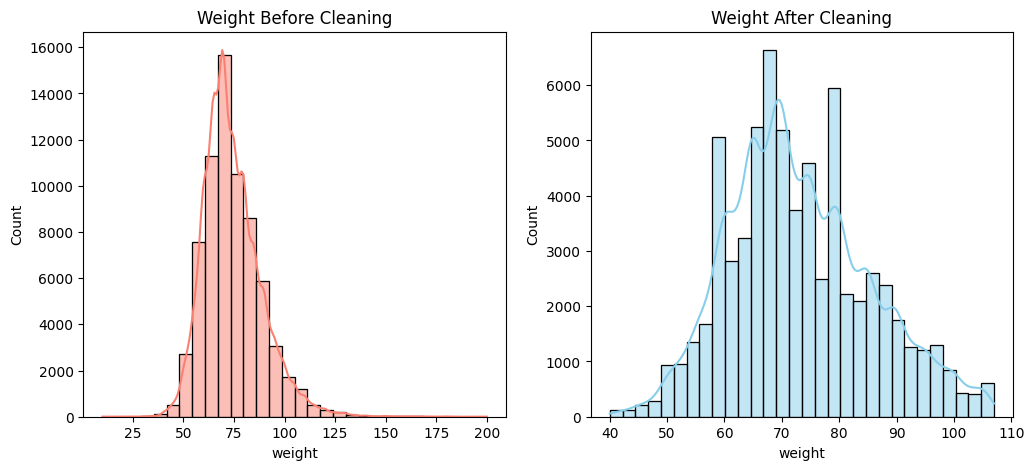

In [104]:

plt.figure(figsize=(10,5))
sns.boxplot(data=data[['weight', 'height']], palette='pastel')
plt.title('Box Plot (Before Cleaning)')
plt.ylabel('Value')
plt.show()

Q1_h = data['height'].quantile(0.25)
Q3_h = data['height'].quantile(0.75)
IQR_h = Q3_h - Q1_h
low_h, high_h = Q1_h - 1.5 * IQR_h, Q3_h + 1.5 * IQR_h

Q1_w = data['weight'].quantile(0.25)
Q3_w = data['weight'].quantile(0.75)
IQR_w = Q3_w - Q1_w
low_w, high_w = Q1_w - 1.5 * IQR_w, Q3_w + 1.5 * IQR_w

data_cleaned = data[
    (data['height'] >= low_h) & (data['height'] <= high_h) &
    (data['weight'] >= low_w) & (data['weight'] <= high_w)
]

print(f"Before cleaning: {len(data)} rows")
print(f"After cleaning:  {len(data_cleaned)} rows")
print(f"Removed: {(1 - len(data_cleaned)/len(data))*100:.2f}% of rows")


plt.figure(figsize=(10,5))
sns.boxplot(data=data_cleaned[['weight', 'height']], palette='coolwarm')
plt.title('Box Plot (After Cleaning)')
plt.ylabel('Value')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=data, x='weight', bins=30, color='salmon', kde=True, ax=axes[0])
sns.histplot(data=data_cleaned, x='weight', bins=30, color='skyblue', kde=True, ax=axes[1])
axes[0].set_title('Weight Before Cleaning')
axes[1].set_title('Weight After Cleaning')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_28656\2466975280.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


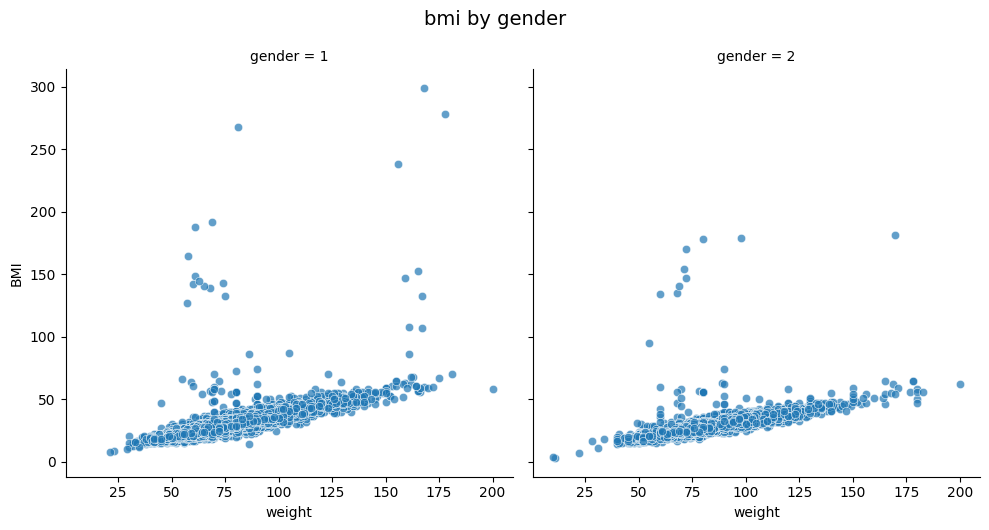

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(
    data=data,
    x='weight', 
    y='BMI', 
    col='gender',        
    kind='scatter',
    palette='Set2',
    alpha=0.7,
    height=5, aspect=1
)

plt.suptitle('bmi by gender', y=1.05, fontsize=14)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_28656\1573925977.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


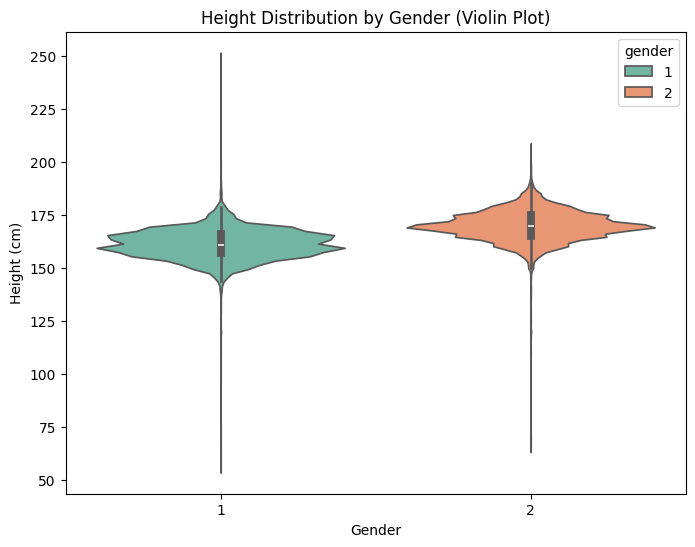

In [106]:


plt.figure(figsize=(8,6))
sns.violinplot(
    data=data, 
    x='gender', 
    y='height',
    hue='gender',        
    scale='count',
    palette='Set2'
)

plt.title('Height Distribution by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.show()


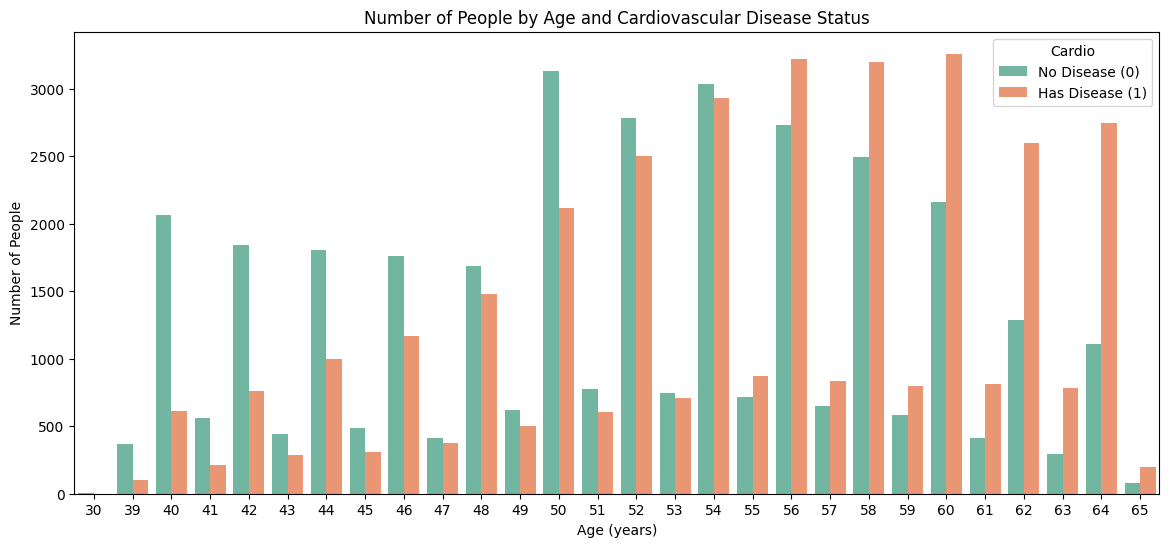

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.countplot(
    data=data,
    x='age_years',
    hue='cardio',
    palette='Set2'
)

plt.title('Number of People by Age and Cardiovascular Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Number of People')
plt.legend(title='Cardio', labels=['No Disease (0)', 'Has Disease (1)'])
plt.show()


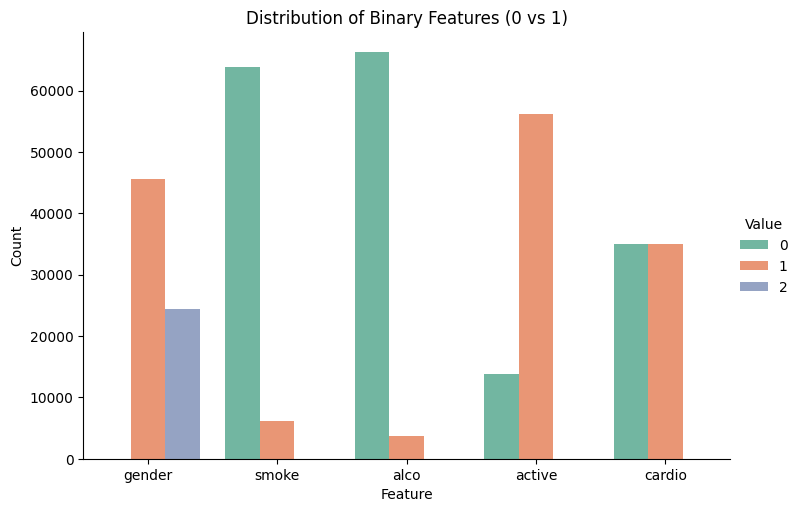

In [108]:


binary_features = ['gender', 'smoke', 'alco', 'active', 'cardio']

data_melted = data.melt(value_vars=binary_features, var_name='Feature', value_name='Value')
data_melted.head()

sns.catplot(
    data=data_melted,
    x='Feature',
    hue='Value',
    kind='count',
    palette='Set2',
    height=5,
    aspect=1.5
)

plt.title('Distribution of Binary Features (0 vs 1)')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()
